<h2>5조</h2>
- 김민정 : 데이터 분석<br>
- 노정민 : 모델 개선<br>
- 임한희 : 모델 분석<br>
- 정희석 : 데이터 가공

Early Stop, Model CheckPoint를 사용하지 않았습니다.<br>
이유는 Early Stop, Model CheckPoint는 학습을 더 잘 하기 위한 척도로써 이용될 수 있다고 판단했고<br>
이 프로젝트의 목적은 처음보는 데이터가 어떻게 구성되어 있고 어떻게 가공해서 학습을 진행하였을 때<br>
어떤 분포를 보이는지를 확인하는데 그 목적이 있습니다.

In [87]:
# -*- coding: utf-8 -*-
# 코드 내부에 한글을 사용가능 하게 해주는 부분입니다.

# pandas 라이브러리를 불러옵니다.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 딥러닝을 구동하는 데 필요한 케라스 함수를 불러옵니다.
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

# 필요한 라이브러리를 불러옵니다.
import numpy as np
import tensorflow as tf

In [88]:
df = pd.read_csv('./data/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# 데이터 확인 용
# for data in df.values:
#     print(type(data))

In [89]:
class_list = df.values[:,-1]
df['normAmount'] = df['Amount']
df = df.drop(columns=['Class'])
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,normAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,10.00


In [90]:
print(class_list)

[0. 0. 0. ... 0. 0. 0.]


In [91]:
amount = []
for data in df.values:
    amount.append([data[-1]])
# amount = np.array(amount)

print(len(amount))
print(type(amount))
# print(amount)

284807
<class 'list'>


Amount Normalization 진행

<h1>Min-Max Scaler를 사용하였고 => Amount에 적용<br>
Z score Scaler => V1 ~ V28까지 이미 적용 되어있는 것.</h1>

In [92]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(amount))
norm_amount = scaler.transform(amount).flatten() # ==> np.reshape(-1)
print(norm_amount[0])
print(amount[0])

MinMaxScaler()
0.005823793086804956
[149.62]


<h2>Standard Scaler(Z score Scaler) => V1 ~ V28까지 이미 적용 되어있는 것. => Amount에 적용</h2>

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
print(scaler.fit(amount))
norm_amount = scaler.transform(amount).flatten() # ==> np.reshape(-1)
print(norm_amount[0])
print(amount[0])

StandardScaler()
0.24496426337017338
[149.62]


데이터에 추가.

In [93]:
for index, data in enumerate(df.values):
#     print(index)
    data[-1] = norm_amount[index]

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,normAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.005824
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.000105
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.014739
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.004807
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.002724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.000030
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.000965
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.002642
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.000389


class_list : 라벨들.<br>
df : 정규화까지 완료된 데이터들.

In [94]:
df['Class'] = df['normAmount']
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,normAmount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.005824,0.005824
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.000105,0.000105
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.014739,0.014739
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.004807,0.004807
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.002724,0.002724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.000030,0.000030
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.000965,0.000965
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.002642,0.002642
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.000389,0.000389


In [95]:
for index, data in enumerate(df.values):
    data[-1] = class_list[index]

df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,normAmount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.005824,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.000105,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.014739,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.004807,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.002724,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0.000030,0.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.000965,0.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.002642,0.0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0.000389,0.0


**데이터 셔플**<br>


암호 -> 123 -> 다음번에 돌릴때도 123해놓으면 똑같은 값들이 나온다

In [96]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,normAmount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.005824,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.000105,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.014739,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.004807,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.002724,0.0


In [97]:
data_shuffled=df.sample(frac=1,random_state = 123).reset_index(drop=True) # 암호 -> 123
data_shuffled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,normAmount,Class
0,54992.0,-0.623235,1.097949,0.748810,0.763394,-0.179458,-0.258895,0.430106,0.466788,-0.935937,...,0.468435,-0.055127,-0.012280,-0.236499,-0.327825,0.023302,0.089418,50.00,0.001946,0.0
1,145983.0,2.155748,-0.998223,-1.158978,-0.992298,-0.484600,-0.308857,-0.677077,-0.193517,-0.083026,...,0.519005,0.003460,-1.017962,-0.009465,-0.118435,-0.006350,-0.053375,58.00,0.002258,0.0
2,142073.0,1.614893,-0.194953,-2.050402,1.469645,0.540352,-0.665439,0.677713,-0.246032,-0.079937,...,-0.369654,-0.071308,-0.520915,0.091351,-0.749140,-0.023202,-0.003519,198.00,0.007707,0.0
3,132462.0,1.908756,-2.517443,0.277391,-1.466555,-1.521858,3.005920,-2.800770,0.981435,0.349534,...,0.984547,0.163995,-0.905736,-0.511626,0.097492,0.147579,-0.036551,82.00,0.003192,0.0
4,119001.0,2.120853,-1.048240,-1.895990,-1.236063,-0.038722,-0.274832,-0.388942,-0.196979,-0.649028,...,1.125977,-0.263681,-1.322770,0.308495,0.132642,-0.057106,-0.074845,93.75,0.003649,0.0


In [98]:
class_list = data_shuffled.values[:,-1]
data_shuffled = data_shuffled.drop(columns=['Amount','Class'])
print(class_list)

[0. 0. 0. ... 0. 0. 0.]


In [99]:
data_shuffled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,normAmount
0,54992.0,-0.623235,1.097949,0.748810,0.763394,-0.179458,-0.258895,0.430106,0.466788,-0.935937,...,-0.066304,0.243136,0.468435,-0.055127,-0.012280,-0.236499,-0.327825,0.023302,0.089418,0.001946
1,145983.0,2.155748,-0.998223,-1.158978,-0.992298,-0.484600,-0.308857,-0.677077,-0.193517,-0.083026,...,0.124636,0.174775,0.519005,0.003460,-1.017962,-0.009465,-0.118435,-0.006350,-0.053375,0.002258
2,142073.0,1.614893,-0.194953,-2.050402,1.469645,0.540352,-0.665439,0.677713,-0.246032,-0.079937,...,0.173336,-0.029061,-0.369654,-0.071308,-0.520915,0.091351,-0.749140,-0.023202,-0.003519,0.007707
3,132462.0,1.908756,-2.517443,0.277391,-1.466555,-1.521858,3.005920,-2.800770,0.981435,0.349534,...,-0.350968,0.050867,0.984547,0.163995,-0.905736,-0.511626,0.097492,0.147579,-0.036551,0.003192
4,119001.0,2.120853,-1.048240,-1.895990,-1.236063,-0.038722,-0.274832,-0.388942,-0.196979,-0.649028,...,0.176958,0.455959,1.125977,-0.263681,-1.322770,0.308495,0.132642,-0.057106,-0.074845,0.003649


학습 데이터셋

**이 과정은 본래의 데이터를 가공하지 않고 학습 했을 때 일어나는 일을 보기 위해 작성**

In [100]:
x = data_shuffled.values
y = class_list
print(x.shape)
# x_train => 
# x_test =>

(284807, 30)


모델링

In [101]:
model = Sequential()
model.add(Dense(250, input_dim=30, activation='relu' ))
model.add(Dense(124, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(62, activation='relu'))
model.add(Dense(31, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [102]:
model.summary()
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy','Recall','Precision'])

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_27 (Dense)             (None, 250)               7750      
_________________________________________________________________
dense_28 (Dense)             (None, 124)               31124     
_________________________________________________________________
dropout_12 (Dropout)         (None, 124)               0         
_________________________________________________________________
dense_29 (Dense)             (None, 62)                7750      
_________________________________________________________________
dense_30 (Dense)             (None, 31)                1953      
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 32        
Total params: 48,609
Trainable params: 48,609
Non-trainable params: 0
__________________________________________________

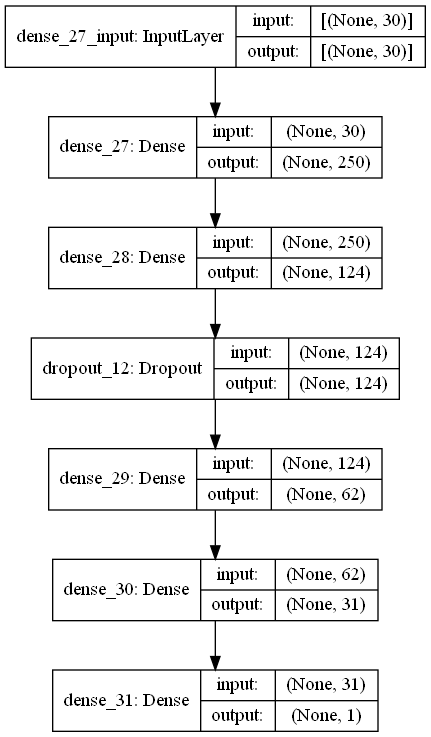

In [103]:
tf.keras.utils.plot_model(model, show_shapes=True) #입력, 출력 데이터의 틀을 보여준다

학습 진행

In [104]:
# 모델을 실행합니다.
history_1 = model.fit(x, y, epochs=20, batch_size=100) # batch_size #확인을 위해서 20번만

Epoch 1/20
2849/2849 [==============================] - 7s 2ms/step - loss: 16.3738 - accuracy: 0.9926 - recall: 0.0027 - precision: 0.0018
Epoch 2/20
2849/2849 [==============================] - 6s 2ms/step - loss: 0.1076 - accuracy: 0.9964 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 3/20
2849/2849 [==============================] - 6s 2ms/step - loss: 0.2656 - accuracy: 0.9983 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 4/20
2849/2849 [==============================] - 6s 2ms/step - loss: 0.0141 - accuracy: 0.9983 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 5/20
2849/2849 [==============================] - 6s 2ms/step - loss: 0.0122 - accuracy: 0.9984 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 6/20
2849/2849 [==============================] - 6s 2ms/step - loss: 0.0730 - accuracy: 0.9979 - recall: 0.0000e+00 - precision: 0.0000e+00
Epoch 7/20
2849/2849 [==============================] - 6s 2ms/step - loss: 0.0145 - accuracy: 0.9983 - recall: 0.0000e+00 - 

492 / 284315 = 0.001727485630620034 => 0.0017%의 확률이므로 0으로 찍어도 최소 99.82%는 나온다.<br>
해야하는 것 : 
1. 492를 뻥튀기 <br>-> 여러 번 반복한다

=> 데이터가 일그러진다 조작된다 -> 영향이 가지 않을까?
-> 일리가 있다. 하지만 대체할 수 없기 때문에 시도를 해 보는것이다
==> 알수 있는것 : 블랙박스다(= 모른다)<br>

2. 28만개를 좀 줄인다.
3. 이상치를 걸러내본다.

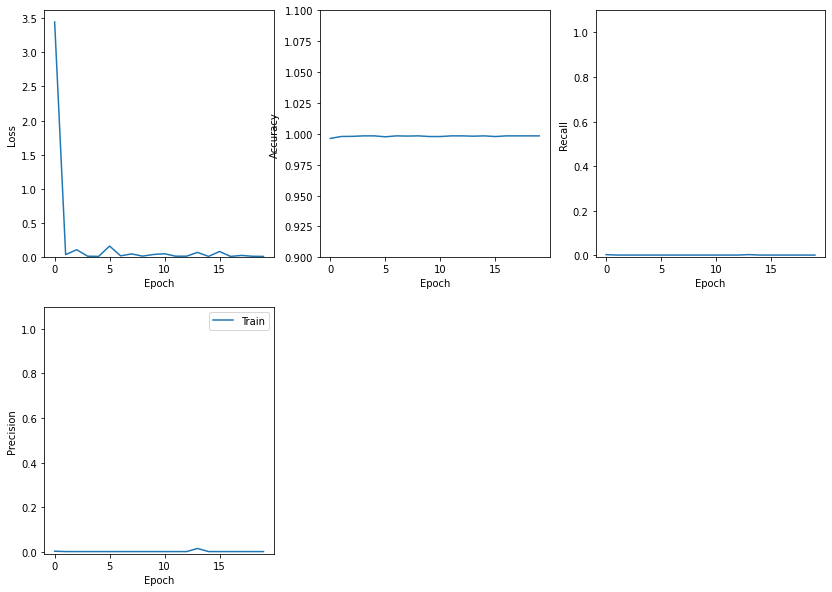

In [105]:
def plot_metrics(history):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    metrics = ['loss', 'accuracy','recall','precision']#,'AUPRC - PRC']
    plt.rcParams["figure.figsize"] = (14,10)
    for n, metrics in enumerate(metrics):
        name = metrics.replace("_"," ").capitalize()
        plt.subplot(2,3,n+1)
        plt.plot(history.epoch, history.history[metrics],color=colors[0],label='Train')
#         if metrics != 'AUPRC - PRC':
#             plt.plot(history.epoch, history.history[metrics],color=colors[0],label='Train')
#         plt.plot(history.epoch, history.history['val_'+ metrics],
#             color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metrics == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metrics == 'accuracy':
            plt.ylim([0.9,1.1])
        elif metrics == 'precision':
            plt.ylim([-0.01, 1.1])
        elif metrics == 'recall':
            plt.ylim([-0.01, 1.1])   
#         elif metrics == 'AUPRC - PRC':
#             print('in')
#             plt.xlabel('recall')
#             plt.ylabel('precision')
#             plt.plot(history.history['recall'], history.history['precision'],color=colors[0],label='Train')
        else:
            plt.ylim([0,1])
    
    plt.legend()


plot_metrics(history_1)

In [106]:
metrics = ['loss', 'accuracy','recall','precision']
type(float(pd.DataFrame(history_1.history['recall']).max()[0]))

float

손실, 정확도,

실질적으로 여기 아래 부분을 복사를 하던 해서 커스텀 하시면 됩니다,

**정상 vs 비정상(사기) 데이터 구분하기**<br>
이상치 제거 안한 결과 & 사기 데이터 복제 및 정상 데이터 축소

In [107]:
df_2 = df.drop(columns=['Amount'])

In [108]:
# Numpy를 이용하여 데이터 구분하기
fraud = []
non_fraud = [] # 건드려야할 데이터.
for data in df_2.values:
    if data[-1] == 1:
        fraud.append(data)
    else:
        non_fraud.append(data)

print(len(fraud))
print(len(non_fraud))

492
284315


In [109]:
fraud[0]

array([ 4.06000000e+02, -2.31222654e+00,  1.95199201e+00, -1.60985073e+00,
        3.99790559e+00, -5.22187865e-01, -1.42654532e+00, -2.53738731e+00,
        1.39165725e+00, -2.77008928e+00, -2.77227214e+00,  3.20203321e+00,
       -2.89990739e+00, -5.95221881e-01, -4.28925378e+00,  3.89724120e-01,
       -1.14074718e+00, -2.83005567e+00, -1.68224682e-02,  4.16955705e-01,
        1.26910559e-01,  5.17232371e-01, -3.50493686e-02, -4.65211076e-01,
        3.20198199e-01,  4.45191675e-02,  1.77839798e-01,  2.61145003e-01,
       -1.43275875e-01,  0.00000000e+00,  1.00000000e+00])

데이터 관리

In [110]:
# 사기 데이터 늘리기
for i in range(4):
    l = len(fraud)
    for index in range(l):
        fraud.append(fraud[index])


In [111]:
p_data = []
for data in fraud:
    p_data.append(data)
        
for i in range(40000):# 1. 값 = 비율 조절. 돌려보는 
    p_data.append(non_fraud[i])

print(len(p_data)) #7820 + 78720 

47872


정상 : 91% vs 비정상 : 9%

데이터 스플릿<br>
85:15

In [112]:
p_data = np.array(p_data)

x = p_data[:,:-1]

y = p_data[:,-1]

In [113]:
print(len(x[0]))

30


In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [115]:
model = Sequential() # 2. 이거 만들어보기.
model.add(Dense(250, input_dim=30, activation='relu' ))
model.add(Dense(124, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(62, activation='relu'))
model.add(Dense(31, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [116]:
model.summary()
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy',tf.keras.metrics.Precision(name='precision'),tf.keras.metrics.Recall(name='recall')])
#tf.keras.metrics.Precision(name=

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 250)               7750      
_________________________________________________________________
dense_33 (Dense)             (None, 124)               31124     
_________________________________________________________________
dropout_13 (Dropout)         (None, 124)               0         
_________________________________________________________________
dense_34 (Dense)             (None, 62)                7750      
_________________________________________________________________
dense_35 (Dense)             (None, 31)                1953      
_________________________________________________________________
dense_36 (Dense)             (None, 1)                 32        
Total params: 48,609
Trainable params: 48,609
Non-trainable params: 0
__________________________________________________

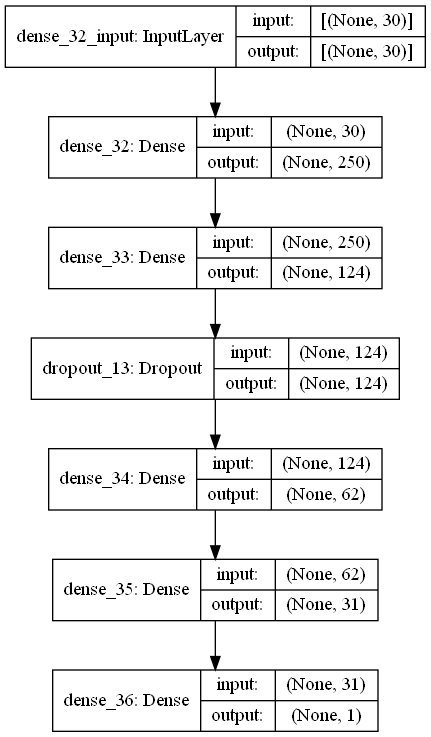

In [117]:
tf.keras.utils.plot_model(model, show_shapes=True)

학습 진행

In [118]:
# 모델을 실행합니다.
history_2 = model.fit(X_train, y_train, epochs=20, batch_size=100, validation_data=(X_test,y_test)) # batch_size 

Epoch 1/20
383/383 [==============================] - 2s 3ms/step - loss: 55.8656 - accuracy: 0.6153 - precision: 0.1813 - recall: 0.3859 - val_loss: 0.4670 - val_accuracy: 0.8317 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/20
383/383 [==============================] - 1s 2ms/step - loss: 0.5017 - accuracy: 0.8338 - precision: 0.4495 - recall: 0.0173 - val_loss: 0.4531 - val_accuracy: 0.8317 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/20
383/383 [==============================] - 1s 2ms/step - loss: 0.4475 - accuracy: 0.8356 - precision: 0.1117 - recall: 0.0028 - val_loss: 0.4531 - val_accuracy: 0.8317 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/20
383/383 [==============================] - 1s 2ms/step - loss: 0.4689 - accuracy: 0.8368 - precision: 0.5927 - recall: 0.0025 - val_loss: 0.4534 - val_accuracy: 0.8317 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/20
383/383 [==============================] - 1s 3ms/step - los

In [119]:
def plot_metrics(history):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    metrics = ['loss', 'accuracy','recall','precision']#,'AUPRC - PRC']
    plt.rcParams["figure.figsize"] = (14,10)
    for n, metrics in enumerate(metrics):
        name = metrics.replace("_"," ").capitalize()
        plt.subplot(2,3,n+1)
        plt.plot(history.epoch, history.history[metrics],color=colors[0],label='Train')
#         if metrics != 'AUPRC - PRC':
#             plt.plot(history.epoch, history.history[metrics],color=colors[0],label='Train')
        plt.plot(history.epoch, history.history['val_'+ metrics],
            color=colors[0], linestyle="--", label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metrics == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metrics == 'accuracy':
            plt.ylim([0.9,1.1])
        elif metrics == 'precision':
            plt.ylim([-0.01, 1.1])
        elif metrics == 'recall':
            plt.ylim([-0.01, 1.1])   
#         elif metrics == 'AUPRC - PRC':
#             print('in')
#             plt.xlabel('recall')
#             plt.ylabel('precision')
#             plt.plot(history.history['recall'], history.history['precision'],color=colors[0],label='Train')
        else:
            plt.ylim([0,1])
    
    plt.legend()


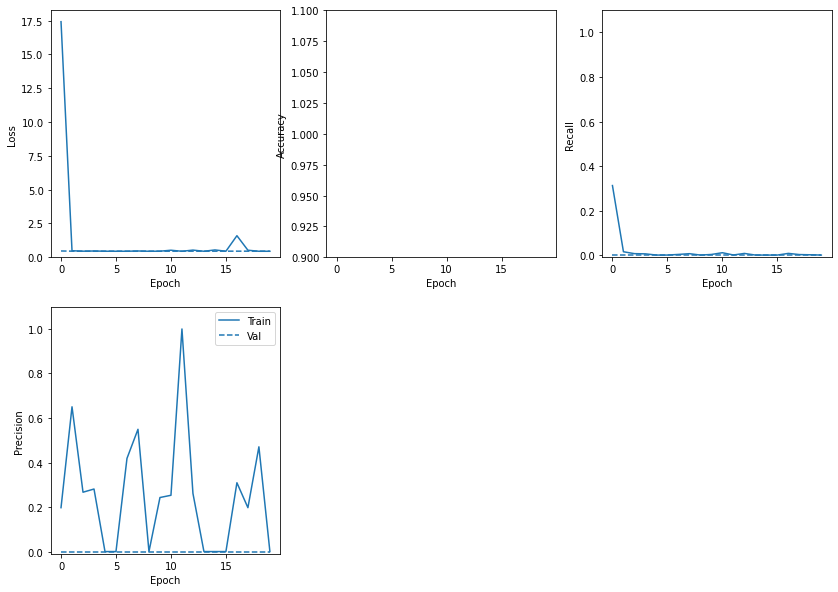

In [120]:
plot_metrics(history_2)

# TO DO

0514

**정상 vs 비정상(사기) 데이터 구분하기**<br>
이상치 제거(Z-Score 기준) & 사기 데이터와 정상 데이터의 비율 조절 (사기 : 정상 = 1 : 2)

데이터 값 분포를 막대그래프로 나타낸 결과

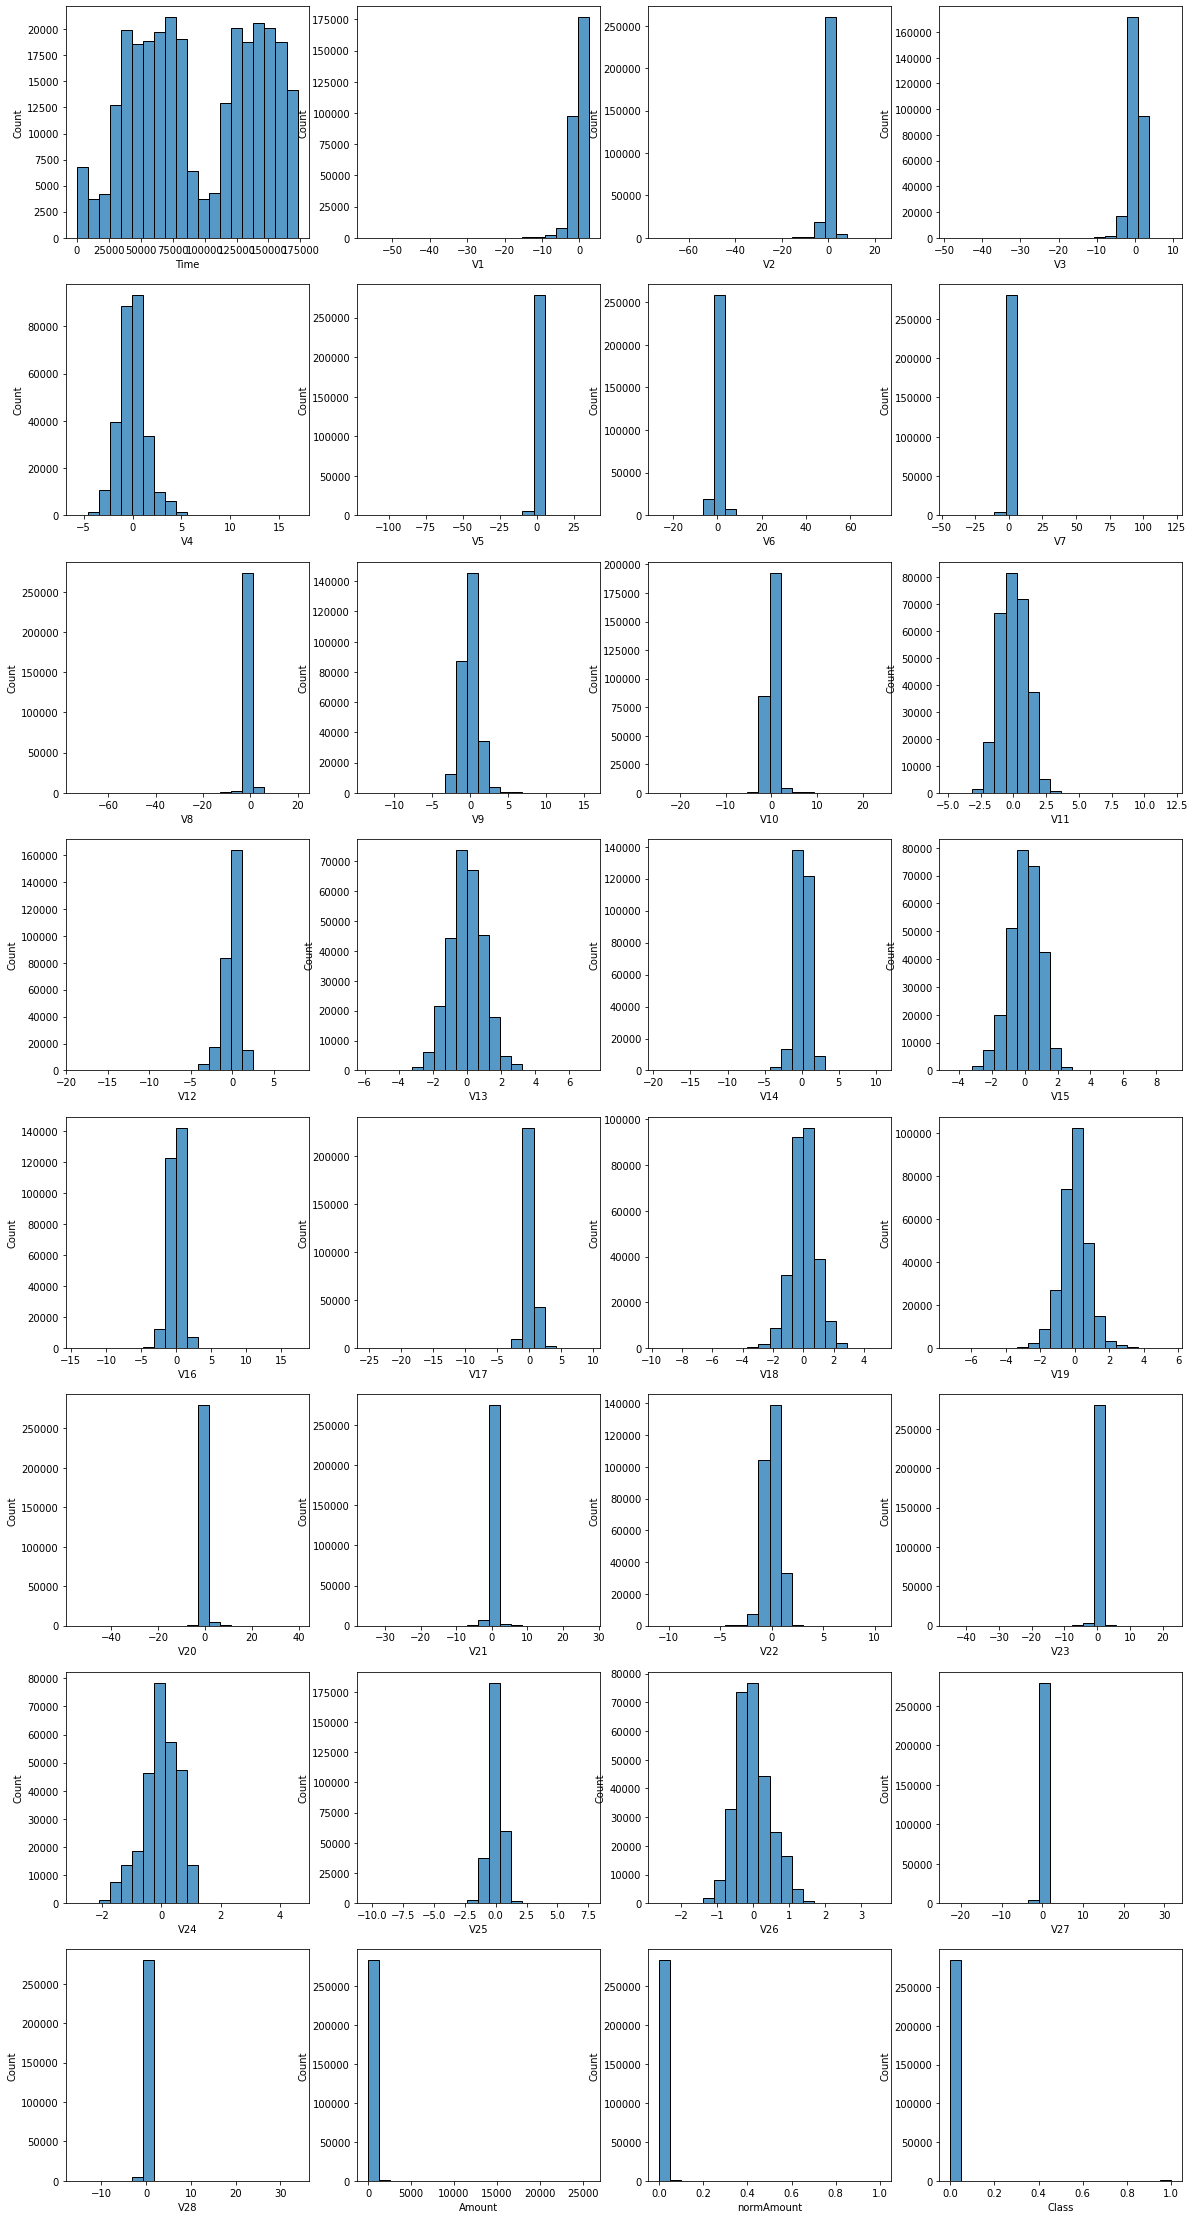

In [121]:
fig, axes = plt.subplots(8, 4, figsize=(20, 40))
i = 0
j = 0
for vars in df.columns :
    sns.histplot(data = df, x = vars, bins = 20, ax = axes[i,j])
    j = j + 1
    if j == 4 :
        i = i + 1
        j = 0

**Precision & Recall**<br>
Precision : 분류의 정확도 -> True_Positive/예측 Positive 전체<br>
Recall : 분류의 검출율 -> True_Positive/본래 Positive 전체<br>

1. 데이터 관리에 fraud가 아닌것의 개수(비율) 조절해서 돌려보기<br>
2. 나만의 모델 만들어보기. => 추가 삭제 개수 늘림 줄임 다 가능

시간은 순차적 데이터 인듯 보이므로 배제해도 문제가 없을 것으로 예상

<h3>z-score를 기준으로 V1 ~ V28까지의 이상치(절대값 3 이상)제거.</h3>
- 3을 이상치로 지정한 이유 : Standard_Scaler(z-score) 정규화를 진행한 결과는 평균이 0, 표준편차가 1에 가까운 분포로 변환 <br>
- kaggle에서의 V1 ~ V28의 데이터 column의 분포를 본 결과 25% ~75%는 [-1, 1]사이에 존재.<br>
- 여기에서 heuristic(휴리스틱)하게 값을 3으로 정함

Heuristic -> 직감

In [122]:
from scipy import stats
df_3 = df[(np.abs(stats.zscore(df.iloc[:,1:29])) < 3).all(axis=1)]
df_3

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,normAmount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.005824,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.000105,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.004807,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.002724,0.0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.000143,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284800,172784.0,2.039560,-0.175233,-1.196825,0.234580,-0.008713,-0.726571,0.017050,-0.118228,0.435402,...,-0.717211,0.297930,-0.359769,-0.315610,0.201114,-0.080826,-0.075071,2.68,0.000104,0.0
284801,172785.0,0.120316,0.931005,-0.546012,-0.745097,1.130314,-0.235973,0.812722,0.115093,-0.204064,...,-0.808520,0.050343,0.102800,-0.435870,0.124079,0.217940,0.068803,2.69,0.000105,0.0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0.000965,0.0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0.002642,0.0


In [123]:
df_3 = df.drop(columns=['Time','Amount'])

In [124]:
# Pandas를 이용하여 데이터 구분하기
non_fraud = df_3[df_3['Class']==0]
fraud = df_3[df_3['Class']==1]
non_fraud = non_fraud.sample(fraud.shape[0]*2)
non_fraud.shape
data = fraud.append(non_fraud, ignore_index=True)

<h3>outlier를 제거 하였으나 사기 데이터는 날라가지 않았다.</h3>

In [125]:
print(len(fraud))

492


데이터 분리

In [126]:
X = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [127]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 145, stratify = y) #stratify : Y(라벨)의 존재 확률에 맞춰서 분배.

In [128]:
print(X_train)

             V1         V2         V3        V4         V5        V6  \
1420  -2.218516   1.609126  -2.470732 -2.300662   1.941906  3.117724   
72   -25.942434  14.601998 -27.368650  6.378395 -19.104033 -4.684806   
546    1.145100  -0.681709   1.664002  0.005182  -1.746831  0.005544   
97    -3.519030   4.140867  -3.628202  5.505672  -4.057463 -0.905945   
516   -0.483686  -4.410583   0.252951 -0.146863  -3.185208 -0.101357   
...         ...        ...        ...       ...        ...       ...   
177   -2.986466  -0.000891   0.605887  0.338338   0.685448 -1.581954   
192   -0.264869   3.386140  -3.454997  4.367629   3.336060 -2.053918   
58   -16.598665  10.541751 -19.818982  6.017295 -13.025901 -4.128779   
1360   1.551605  -0.921394  -0.414122 -1.934404  -0.222062  0.607256   
804   -1.074237  -0.780975   0.923050 -2.200484   1.714383 -0.559763   

             V7         V8        V9       V10  ...       V20       V21  \
1420  -0.696318   2.462139 -0.524641 -1.807090  ... -0.75796

### DNN

In [129]:
model_DNN = Sequential() # 2. 이거 만들어보기.
model_DNN.add(Dense(300, input_dim=29, activation='relu' ))
model_DNN.add(Dropout(0.2))
model_DNN.add(Dense(150, activation='relu'))
model_DNN.add(Dropout(0.3))
model_DNN.add(Dense(75, activation='relu'))
model_DNN.add(Dropout(0.2))
model_DNN.add(Dense(29, activation='relu'))
model_DNN.add(Dense(1, activation='sigmoid'))

In [130]:
model_DNN.summary()
model_DNN.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy','Precision','Recall'])
#tf.keras.metrics.Precision(name=

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_37 (Dense)             (None, 300)               9000      
_________________________________________________________________
dropout_14 (Dropout)         (None, 300)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 150)               45150     
_________________________________________________________________
dropout_15 (Dropout)         (None, 150)               0         
_________________________________________________________________
dense_39 (Dense)             (None, 75)                11325     
_________________________________________________________________
dropout_16 (Dropout)         (None, 75)                0         
_________________________________________________________________
dense_40 (Dense)             (None, 29)               

In [131]:
# 모델을 실행합니다.
history_D = model_DNN.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test,y_test)) # batch_size 

Epoch 1/500
40/40 [==============================] - 1s 11ms/step - loss: 0.4541 - accuracy: 0.7581 - precision: 0.6349 - recall: 0.8722 - val_loss: 0.1233 - val_accuracy: 0.9595 - val_precision: 0.9851 - val_recall: 0.8919
Epoch 2/500
40/40 [==============================] - 0s 3ms/step - loss: 0.1553 - accuracy: 0.9423 - precision: 0.9775 - recall: 0.8514 - val_loss: 0.0882 - val_accuracy: 0.9640 - val_precision: 0.9583 - val_recall: 0.9324
Epoch 3/500
40/40 [==============================] - 0s 3ms/step - loss: 0.1320 - accuracy: 0.9546 - precision: 0.9656 - recall: 0.8910 - val_loss: 0.1089 - val_accuracy: 0.9595 - val_precision: 0.9333 - val_recall: 0.9459
Epoch 4/500
40/40 [==============================] - 0s 3ms/step - loss: 0.1021 - accuracy: 0.9694 - precision: 0.9632 - recall: 0.9458 - val_loss: 0.1145 - val_accuracy: 0.9640 - val_precision: 0.9459 - val_recall: 0.9459
Epoch 5/500
40/40 [==============================] - 0s 3ms/step - loss: 0.1112 - accuracy: 0.9579 - precis

Epoch 38/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0244 - accuracy: 0.9900 - precision: 0.9841 - recall: 0.9858 - val_loss: 0.3183 - val_accuracy: 0.9595 - val_precision: 0.9333 - val_recall: 0.9459
Epoch 39/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0079 - accuracy: 0.9971 - precision: 0.9943 - recall: 0.9970 - val_loss: 0.3719 - val_accuracy: 0.9595 - val_precision: 0.9333 - val_recall: 0.9459
Epoch 40/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0242 - accuracy: 0.9897 - precision: 0.9739 - recall: 0.9946 - val_loss: 0.4146 - val_accuracy: 0.9595 - val_precision: 0.9577 - val_recall: 0.9189
Epoch 41/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0101 - accuracy: 0.9978 - precision: 0.9957 - recall: 0.9977 - val_loss: 0.4223 - val_accuracy: 0.9550 - val_precision: 0.9444 - val_recall: 0.9189
Epoch 42/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0121 - accuracy: 0.9974 - pr

40/40 [==============================] - 0s 3ms/step - loss: 0.0091 - accuracy: 0.9960 - precision: 0.9926 - recall: 0.9943 - val_loss: 0.5634 - val_accuracy: 0.9324 - val_precision: 0.8831 - val_recall: 0.9189
Epoch 75/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0057 - accuracy: 0.9990 - precision: 0.9991 - recall: 0.9978 - val_loss: 0.5650 - val_accuracy: 0.9505 - val_precision: 0.9315 - val_recall: 0.9189
Epoch 76/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0072 - accuracy: 0.9992 - precision: 0.9989 - recall: 0.9987 - val_loss: 0.5369 - val_accuracy: 0.9550 - val_precision: 0.9324 - val_recall: 0.9324
Epoch 77/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0013 - accuracy: 0.9996 - precision: 1.0000 - recall: 0.9987 - val_loss: 0.5561 - val_accuracy: 0.9550 - val_precision: 0.9324 - val_recall: 0.9324
Epoch 78/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0131 - accuracy: 0.9980 - precision: 0.99

40/40 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.9988 - precision: 1.0000 - recall: 0.9964 - val_loss: 0.4390 - val_accuracy: 0.9459 - val_precision: 0.9306 - val_recall: 0.9054
Epoch 111/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.9986 - precision: 0.9958 - recall: 1.0000 - val_loss: 0.4484 - val_accuracy: 0.9459 - val_precision: 0.9306 - val_recall: 0.9054
Epoch 112/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.4640 - val_accuracy: 0.9459 - val_precision: 0.9306 - val_recall: 0.9054
Epoch 113/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.9996 - precision: 0.9996 - recall: 0.9991 - val_loss: 0.4653 - val_accuracy: 0.9459 - val_precision: 0.9306 - val_recall: 0.9054
Epoch 114/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.9996 - precision: 

40/40 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 0.9996 - precision: 1.0000 - recall: 0.9989 - val_loss: 0.5943 - val_accuracy: 0.9459 - val_precision: 0.9306 - val_recall: 0.9054
Epoch 147/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0034 - accuracy: 0.9987 - precision: 0.9967 - recall: 0.9991 - val_loss: 0.5824 - val_accuracy: 0.9459 - val_precision: 0.9306 - val_recall: 0.9054
Epoch 148/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.9984 - precision: 0.9949 - recall: 1.0000 - val_loss: 0.5591 - val_accuracy: 0.9505 - val_precision: 0.9565 - val_recall: 0.8919
Epoch 149/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0090 - accuracy: 0.9992 - precision: 0.9976 - recall: 1.0000 - val_loss: 0.5328 - val_accuracy: 0.9505 - val_precision: 0.9565 - val_recall: 0.8919
Epoch 150/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0068 - accuracy: 0.9973 - precision: 

40/40 [==============================] - 0s 3ms/step - loss: 2.8287e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.5501 - val_accuracy: 0.9505 - val_precision: 0.9315 - val_recall: 0.9189
Epoch 183/500
40/40 [==============================] - 0s 3ms/step - loss: 2.7775e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.5671 - val_accuracy: 0.9505 - val_precision: 0.9315 - val_recall: 0.9189
Epoch 184/500
40/40 [==============================] - 0s 3ms/step - loss: 4.4464e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.6034 - val_accuracy: 0.9459 - val_precision: 0.9306 - val_recall: 0.9054
Epoch 185/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 0.9995 - precision: 1.0000 - recall: 0.9986 - val_loss: 0.6067 - val_accuracy: 0.9505 - val_precision: 0.9315 - val_recall: 0.9189
Epoch 186/500
40/40 [==============================] - 0s 3ms/step - loss: 3.6865e-04 - accuracy: 0.99

Epoch 218/500
40/40 [==============================] - 0s 3ms/step - loss: 4.9993e-04 - accuracy: 0.9997 - precision: 1.0000 - recall: 0.9991 - val_loss: 0.9091 - val_accuracy: 0.9459 - val_precision: 0.9306 - val_recall: 0.9054
Epoch 219/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0221 - accuracy: 0.9972 - precision: 0.9958 - recall: 0.9953 - val_loss: 0.6196 - val_accuracy: 0.9459 - val_precision: 0.9306 - val_recall: 0.9054
Epoch 220/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0049 - accuracy: 0.9982 - precision: 0.9975 - recall: 0.9972 - val_loss: 0.4832 - val_accuracy: 0.9459 - val_precision: 0.9306 - val_recall: 0.9054
Epoch 221/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.9997 - precision: 1.0000 - recall: 0.9992 - val_loss: 0.4926 - val_accuracy: 0.9459 - val_precision: 0.9306 - val_recall: 0.9054
Epoch 222/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 1.

40/40 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.9995 - precision: 0.9996 - recall: 0.9988 - val_loss: 0.6825 - val_accuracy: 0.9505 - val_precision: 0.9200 - val_recall: 0.9324
Epoch 255/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0023 - accuracy: 0.9995 - precision: 0.9985 - recall: 1.0000 - val_loss: 0.7280 - val_accuracy: 0.9459 - val_precision: 0.9306 - val_recall: 0.9054
Epoch 256/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 0.9993 - precision: 1.0000 - recall: 0.9980 - val_loss: 0.5533 - val_accuracy: 0.9550 - val_precision: 0.9211 - val_recall: 0.9459
Epoch 257/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0112 - accuracy: 0.9956 - precision: 0.9876 - recall: 0.9994 - val_loss: 0.4573 - val_accuracy: 0.9414 - val_precision: 0.9178 - val_recall: 0.9054
Epoch 258/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 0.9994 - precision: 

40/40 [==============================] - 0s 3ms/step - loss: 9.3044e-04 - accuracy: 0.9996 - precision: 1.0000 - recall: 0.9989 - val_loss: 0.6382 - val_accuracy: 0.9459 - val_precision: 0.9189 - val_recall: 0.9189
Epoch 291/500
40/40 [==============================] - 0s 3ms/step - loss: 6.2992e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.6854 - val_accuracy: 0.9459 - val_precision: 0.9189 - val_recall: 0.9189
Epoch 292/500
40/40 [==============================] - 0s 3ms/step - loss: 6.7979e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.7108 - val_accuracy: 0.9459 - val_precision: 0.9189 - val_recall: 0.9189
Epoch 293/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 0.9996 - precision: 1.0000 - recall: 0.9987 - val_loss: 0.7447 - val_accuracy: 0.9505 - val_precision: 0.9315 - val_recall: 0.9189
Epoch 294/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 0.9991 -

40/40 [==============================] - 0s 3ms/step - loss: 2.2522e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.8825 - val_accuracy: 0.9459 - val_precision: 0.9306 - val_recall: 0.9054
Epoch 327/500
40/40 [==============================] - 0s 3ms/step - loss: 2.5290e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.9069 - val_accuracy: 0.9369 - val_precision: 0.9167 - val_recall: 0.8919
Epoch 328/500
40/40 [==============================] - 0s 3ms/step - loss: 2.7381e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.9013 - val_accuracy: 0.9414 - val_precision: 0.9178 - val_recall: 0.9054
Epoch 329/500
40/40 [==============================] - 0s 3ms/step - loss: 1.5333e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.9061 - val_accuracy: 0.9414 - val_precision: 0.9178 - val_recall: 0.9054
Epoch 330/500
40/40 [==============================] - 0s 3ms/step - loss: 1.6215e-04 - accuracy: 

40/40 [==============================] - 0s 3ms/step - loss: 1.4907e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.8701 - val_accuracy: 0.9505 - val_precision: 0.9315 - val_recall: 0.9189
Epoch 363/500
40/40 [==============================] - 0s 3ms/step - loss: 1.7482e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.8697 - val_accuracy: 0.9505 - val_precision: 0.9315 - val_recall: 0.9189
Epoch 364/500
40/40 [==============================] - 0s 3ms/step - loss: 1.9940e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.8865 - val_accuracy: 0.9414 - val_precision: 0.9178 - val_recall: 0.9054
Epoch 365/500
40/40 [==============================] - 0s 3ms/step - loss: 1.3670e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.8992 - val_accuracy: 0.9414 - val_precision: 0.9178 - val_recall: 0.9054
Epoch 366/500
40/40 [==============================] - 0s 3ms/step - loss: 7.4299e-05 - accuracy: 

Epoch 398/500
40/40 [==============================] - 0s 3ms/step - loss: 4.6908e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.6677 - val_accuracy: 0.9505 - val_precision: 0.9315 - val_recall: 0.9189
Epoch 399/500
40/40 [==============================] - 0s 3ms/step - loss: 8.6053e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.6913 - val_accuracy: 0.9505 - val_precision: 0.9315 - val_recall: 0.9189
Epoch 400/500
40/40 [==============================] - 0s 3ms/step - loss: 3.2151e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.6987 - val_accuracy: 0.9505 - val_precision: 0.9315 - val_recall: 0.9189
Epoch 401/500
40/40 [==============================] - 0s 3ms/step - loss: 5.5215e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.7220 - val_accuracy: 0.9505 - val_precision: 0.9315 - val_recall: 0.9189
Epoch 402/500
40/40 [==============================] - 0s 3ms/step - loss: 3.6799e-0

Epoch 434/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0260 - accuracy: 0.9959 - precision: 0.9976 - recall: 0.9884 - val_loss: 0.5387 - val_accuracy: 0.9505 - val_precision: 0.9315 - val_recall: 0.9189
Epoch 435/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0048 - accuracy: 0.9992 - precision: 1.0000 - recall: 0.9976 - val_loss: 0.4766 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 436/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 0.9993 - precision: 0.9980 - recall: 1.0000 - val_loss: 0.5678 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 437/500
40/40 [==============================] - 0s 3ms/step - loss: 7.7380e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.6363 - val_accuracy: 0.9550 - val_precision: 0.9444 - val_recall: 0.9189
Epoch 438/500
40/40 [==============================] - 0s 3ms/step - loss: 2.3019e-04 - accuracy

40/40 [==============================] - 0s 3ms/step - loss: 4.6815e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.1310 - val_accuracy: 0.9459 - val_precision: 0.9306 - val_recall: 0.9054
Epoch 471/500
40/40 [==============================] - 0s 3ms/step - loss: 2.2479e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.1661 - val_accuracy: 0.9459 - val_precision: 0.9306 - val_recall: 0.9054
Epoch 472/500
40/40 [==============================] - 0s 3ms/step - loss: 2.3506e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.1923 - val_accuracy: 0.9459 - val_precision: 0.9306 - val_recall: 0.9054
Epoch 473/500
40/40 [==============================] - 0s 3ms/step - loss: 3.5146e-05 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 1.2048 - val_accuracy: 0.9459 - val_precision: 0.9306 - val_recall: 0.9054
Epoch 474/500
40/40 [==============================] - 0s 3ms/step - loss: 0.0039 - accuracy: 0.99

### ANN

In [132]:
model_ANN = Sequential() # 2. 이거 만들어보기.
model_ANN.add(Dense(100, input_dim=29, activation='relu' ))
model_ANN.add(Dropout(0.2))
model_ANN.add(Dense(1, activation='sigmoid'))

In [133]:
model_ANN.summary()
model_ANN.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy','Precision','Recall'])
#tf.keras.metrics.Precision(name=

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_42 (Dense)             (None, 100)               3000      
_________________________________________________________________
dropout_17 (Dropout)         (None, 100)               0         
_________________________________________________________________
dense_43 (Dense)             (None, 1)                 101       
Total params: 3,101
Trainable params: 3,101
Non-trainable params: 0
_________________________________________________________________


In [134]:
# 모델을 실행합니다.
history_A = model_ANN.fit(X_train, y_train, epochs=500, batch_size=32, validation_data=(X_test,y_test)) # batch_size 

Epoch 1/500
40/40 [==============================] - 1s 17ms/step - loss: 0.7889 - accuracy: 0.6737 - precision: 0.5136 - recall: 0.6141 - val_loss: 0.3627 - val_accuracy: 0.9369 - val_precision: 0.9286 - val_recall: 0.8784
Epoch 2/500
40/40 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.9187 - precision: 0.8847 - recall: 0.8684 - val_loss: 0.2601 - val_accuracy: 0.9505 - val_precision: 0.9846 - val_recall: 0.8649
Epoch 3/500
40/40 [==============================] - 0s 2ms/step - loss: 0.2529 - accuracy: 0.9366 - precision: 0.9774 - recall: 0.8265 - val_loss: 0.2022 - val_accuracy: 0.9505 - val_precision: 0.9846 - val_recall: 0.8649
Epoch 4/500
40/40 [==============================] - 0s 2ms/step - loss: 0.2017 - accuracy: 0.9464 - precision: 0.9897 - recall: 0.8490 - val_loss: 0.1671 - val_accuracy: 0.9550 - val_precision: 0.9848 - val_recall: 0.8784
Epoch 5/500
40/40 [==============================] - 0s 2ms/step - loss: 0.1608 - accuracy: 0.9562 - precis

Epoch 38/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0705 - accuracy: 0.9740 - precision: 0.9827 - recall: 0.9356 - val_loss: 0.1083 - val_accuracy: 0.9640 - val_precision: 0.9714 - val_recall: 0.9189
Epoch 39/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0667 - accuracy: 0.9718 - precision: 0.9882 - recall: 0.9311 - val_loss: 0.1128 - val_accuracy: 0.9550 - val_precision: 0.9571 - val_recall: 0.9054
Epoch 40/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0596 - accuracy: 0.9815 - precision: 0.9983 - recall: 0.9435 - val_loss: 0.1100 - val_accuracy: 0.9550 - val_precision: 0.9571 - val_recall: 0.9054
Epoch 41/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0728 - accuracy: 0.9793 - precision: 0.9949 - recall: 0.9411 - val_loss: 0.1107 - val_accuracy: 0.9595 - val_precision: 0.9710 - val_recall: 0.9054
Epoch 42/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0645 - accuracy: 0.9737 - pr

40/40 [==============================] - 0s 2ms/step - loss: 0.0446 - accuracy: 0.9847 - precision: 0.9992 - recall: 0.9542 - val_loss: 0.1473 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 75/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0407 - accuracy: 0.9847 - precision: 0.9954 - recall: 0.9578 - val_loss: 0.1483 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 76/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0320 - accuracy: 0.9916 - precision: 0.9989 - recall: 0.9756 - val_loss: 0.1553 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 77/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0365 - accuracy: 0.9855 - precision: 0.9896 - recall: 0.9664 - val_loss: 0.1578 - val_accuracy: 0.9550 - val_precision: 0.9444 - val_recall: 0.9189
Epoch 78/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0397 - accuracy: 0.9846 - precision: 0.98

40/40 [==============================] - 0s 2ms/step - loss: 0.0225 - accuracy: 0.9936 - precision: 0.9921 - recall: 0.9890 - val_loss: 0.2032 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 111/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0210 - accuracy: 0.9931 - precision: 0.9959 - recall: 0.9837 - val_loss: 0.2035 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 112/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0303 - accuracy: 0.9948 - precision: 0.9943 - recall: 0.9901 - val_loss: 0.2160 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 113/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0165 - accuracy: 0.9953 - precision: 0.9970 - recall: 0.9889 - val_loss: 0.2193 - val_accuracy: 0.9459 - val_precision: 0.9429 - val_recall: 0.8919
Epoch 114/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0246 - accuracy: 0.9933 - precision: 

40/40 [==============================] - 0s 2ms/step - loss: 0.0202 - accuracy: 0.9938 - precision: 0.9878 - recall: 0.9934 - val_loss: 0.2393 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 147/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 0.9982 - precision: 0.9990 - recall: 0.9955 - val_loss: 0.2419 - val_accuracy: 0.9459 - val_precision: 0.9429 - val_recall: 0.8919
Epoch 148/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0193 - accuracy: 0.9899 - precision: 0.9861 - recall: 0.9852 - val_loss: 0.2365 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 149/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0253 - accuracy: 0.9891 - precision: 0.9886 - recall: 0.9817 - val_loss: 0.2317 - val_accuracy: 0.9459 - val_precision: 0.9429 - val_recall: 0.8919
Epoch 150/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0134 - accuracy: 0.9968 - precision: 

40/40 [==============================] - 0s 2ms/step - loss: 0.0115 - accuracy: 0.9967 - precision: 0.9982 - recall: 0.9925 - val_loss: 0.2707 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 183/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9991 - precision: 0.9998 - recall: 0.9975 - val_loss: 0.2776 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 184/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0108 - accuracy: 0.9966 - precision: 0.9984 - recall: 0.9916 - val_loss: 0.2801 - val_accuracy: 0.9459 - val_precision: 0.9429 - val_recall: 0.8919
Epoch 185/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0103 - accuracy: 0.9972 - precision: 0.9933 - recall: 0.9985 - val_loss: 0.2846 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 186/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0097 - accuracy: 0.9984 - precision: 

40/40 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9978 - precision: 0.9936 - recall: 1.0000 - val_loss: 0.3125 - val_accuracy: 0.9550 - val_precision: 0.9444 - val_recall: 0.9189
Epoch 219/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0114 - accuracy: 0.9967 - precision: 1.0000 - recall: 0.9898 - val_loss: 0.3139 - val_accuracy: 0.9459 - val_precision: 0.9429 - val_recall: 0.8919
Epoch 220/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0095 - accuracy: 0.9987 - precision: 1.0000 - recall: 0.9960 - val_loss: 0.3084 - val_accuracy: 0.9550 - val_precision: 0.9444 - val_recall: 0.9189
Epoch 221/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0111 - accuracy: 0.9974 - precision: 0.9957 - recall: 0.9965 - val_loss: 0.3138 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 222/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 1.0000 - precision: 

40/40 [==============================] - 0s 2ms/step - loss: 0.0091 - accuracy: 0.9943 - precision: 0.9964 - recall: 0.9864 - val_loss: 0.3138 - val_accuracy: 0.9550 - val_precision: 0.9444 - val_recall: 0.9189
Epoch 255/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0120 - accuracy: 0.9964 - precision: 0.9984 - recall: 0.9903 - val_loss: 0.3079 - val_accuracy: 0.9550 - val_precision: 0.9444 - val_recall: 0.9189
Epoch 256/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0065 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.3106 - val_accuracy: 0.9550 - val_precision: 0.9444 - val_recall: 0.9189
Epoch 257/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.9988 - precision: 0.9987 - recall: 0.9976 - val_loss: 0.3118 - val_accuracy: 0.9459 - val_precision: 0.9429 - val_recall: 0.8919
Epoch 258/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 1.0000 - precision: 

40/40 [==============================] - 0s 2ms/step - loss: 0.0073 - accuracy: 0.9983 - precision: 0.9973 - recall: 0.9976 - val_loss: 0.3442 - val_accuracy: 0.9459 - val_precision: 0.9429 - val_recall: 0.8919
Epoch 291/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0051 - accuracy: 0.9997 - precision: 1.0000 - recall: 0.9991 - val_loss: 0.3406 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 292/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 0.9998 - precision: 0.9995 - recall: 1.0000 - val_loss: 0.3404 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 293/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0066 - accuracy: 0.9995 - precision: 1.0000 - recall: 0.9986 - val_loss: 0.3416 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 294/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0034 - accuracy: 0.9997 - precision: 

40/40 [==============================] - 0s 2ms/step - loss: 0.0022 - accuracy: 0.9998 - precision: 0.9993 - recall: 1.0000 - val_loss: 0.4123 - val_accuracy: 0.9505 - val_precision: 0.9315 - val_recall: 0.9189
Epoch 327/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0037 - accuracy: 0.9984 - precision: 0.9959 - recall: 0.9992 - val_loss: 0.4063 - val_accuracy: 0.9505 - val_precision: 0.9315 - val_recall: 0.9189
Epoch 328/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.9996 - precision: 0.9989 - recall: 1.0000 - val_loss: 0.4053 - val_accuracy: 0.9550 - val_precision: 0.9444 - val_recall: 0.9189
Epoch 329/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0059 - accuracy: 0.9988 - precision: 0.9963 - recall: 1.0000 - val_loss: 0.4039 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 330/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0061 - accuracy: 0.9983 - precision: 

40/40 [==============================] - 0s 2ms/step - loss: 0.0042 - accuracy: 0.9998 - precision: 1.0000 - recall: 0.9993 - val_loss: 0.4421 - val_accuracy: 0.9550 - val_precision: 0.9571 - val_recall: 0.9054
Epoch 363/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.4450 - val_accuracy: 0.9550 - val_precision: 0.9444 - val_recall: 0.9189
Epoch 364/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0031 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.4458 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 365/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0142 - accuracy: 0.9960 - precision: 0.9971 - recall: 0.9907 - val_loss: 0.4543 - val_accuracy: 0.9459 - val_precision: 0.9306 - val_recall: 0.9054
Epoch 366/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0032 - accuracy: 1.0000 - precision: 

40/40 [==============================] - 0s 2ms/step - loss: 0.0025 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.4562 - val_accuracy: 0.9459 - val_precision: 0.9306 - val_recall: 0.9054
Epoch 399/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.4610 - val_accuracy: 0.9459 - val_precision: 0.9306 - val_recall: 0.9054
Epoch 400/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0024 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.4478 - val_accuracy: 0.9459 - val_precision: 0.9306 - val_recall: 0.9054
Epoch 401/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0021 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.4505 - val_accuracy: 0.9459 - val_precision: 0.9306 - val_recall: 0.9054
Epoch 402/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0064 - accuracy: 0.9994 - precision: 

40/40 [==============================] - 0s 2ms/step - loss: 0.0035 - accuracy: 0.9998 - precision: 1.0000 - recall: 0.9995 - val_loss: 0.4117 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 435/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0026 - accuracy: 0.9985 - precision: 0.9976 - recall: 0.9981 - val_loss: 0.4064 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 436/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0018 - accuracy: 0.9999 - precision: 0.9998 - recall: 1.0000 - val_loss: 0.4073 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 437/500
40/40 [==============================] - 0s 2ms/step - loss: 9.2763e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.4094 - val_accuracy: 0.9550 - val_precision: 0.9571 - val_recall: 0.9054
Epoch 438/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0038 - accuracy: 0.9980 - precisi

40/40 [==============================] - 0s 2ms/step - loss: 0.0017 - accuracy: 0.9993 - precision: 0.9980 - recall: 1.0000 - val_loss: 0.4203 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 471/500
40/40 [==============================] - 0s 2ms/step - loss: 8.8956e-04 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.4225 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 472/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 1.0000 - precision: 1.0000 - recall: 1.0000 - val_loss: 0.4358 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 473/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0023 - accuracy: 0.9993 - precision: 1.0000 - recall: 0.9979 - val_loss: 0.4294 - val_accuracy: 0.9505 - val_precision: 0.9437 - val_recall: 0.9054
Epoch 474/500
40/40 [==============================] - 0s 2ms/step - loss: 0.0020 - accuracy: 0.9997 - precisi

### 결과 출력

In [135]:
def plot_metrics(history):
    colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
    metrics = ['loss', 'accuracy','recall','precision']
    plt.rcParams["figure.figsize"] = (14,10)
    for n, metrics in enumerate(metrics):
        name = metrics.replace("_"," ").capitalize()
        plt.subplot(2,3,n+1)
        if metrics != 'AUPRC - PRC':
            plt.plot(history.epoch, history.history[metrics],color=colors[0],label='Train')
        plt.plot(history.epoch, history.history['val_'+ metrics],
            color=colors[1], label='Val')
        plt.xlabel('Epoch')
        plt.ylabel(name)
        if metrics == 'loss':
            plt.ylim([0, plt.ylim()[1]])
        elif metrics == 'accuracy':
            plt.ylim([0.1,1.1])
        elif metrics == 'recall':
            plt.ylim([-0.1, 1.1])
        elif metrics == 'precision':
            plt.ylim([-0.1, 1.1])
#         elif metrics == 'AUPRC - PRC':
#             print('in')
#             plt.xlabel('recall')
#             plt.ylabel('precision')
#             plt.plot(history.epoch, history.history['recall'], history.history['precision'],color=colors[0],label='Train')
        else:
            plt.ylim([0,1])
    
    plt.legend()




## 결과 비교

기준 : Standard Scaler

### Outlier 처리 X

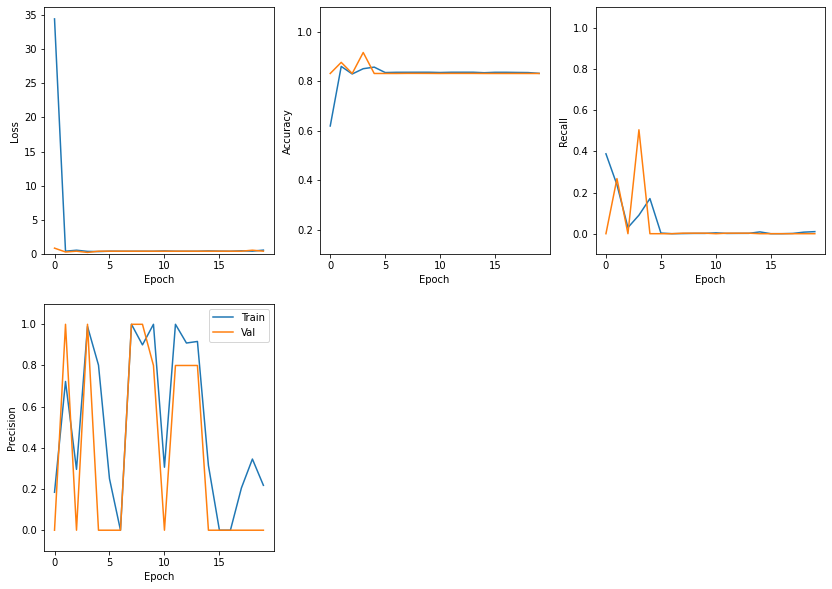

In [83]:
plot_metrics(history_2)

### ANN

float

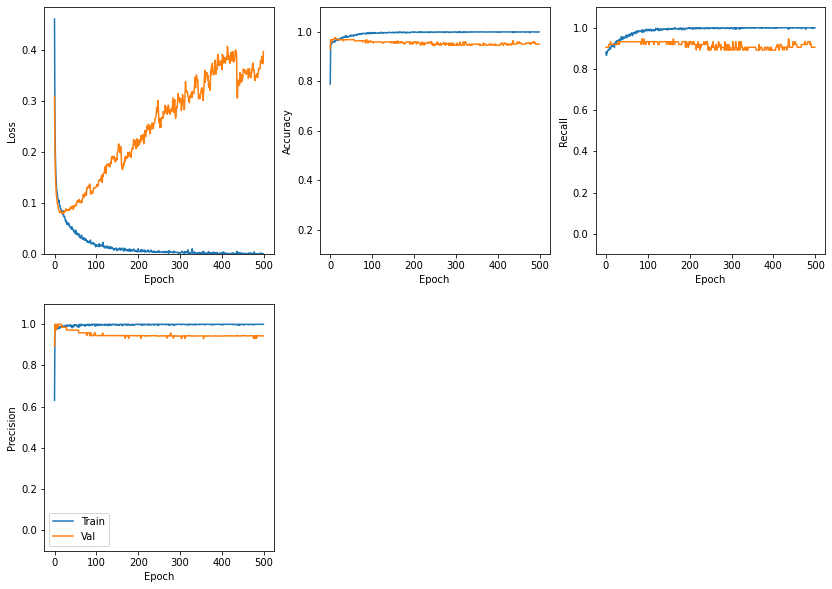

In [76]:
plot_metrics(history_A)

metrics = ['loss', 'accuracy','recall','precision']
type(float(pd.DataFrame(history_A.history['recall']).max()[0]))

### DNN

float

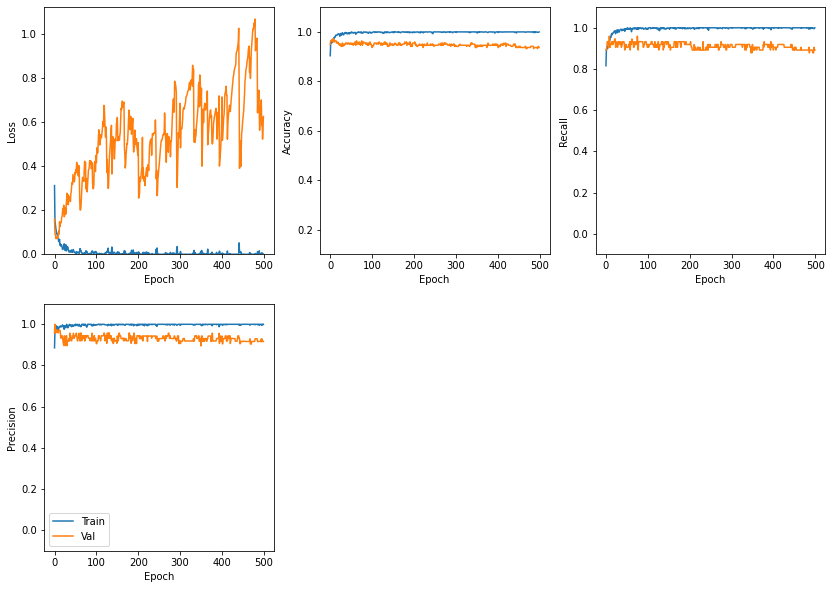

In [77]:
plot_metrics(history_D)

metrics = ['loss', 'accuracy','recall','precision']
type(float(pd.DataFrame(history_D.history['recall']).max()[0]))

기준 : Min_Max Scaler (Amount)

### Outlier 처리 X

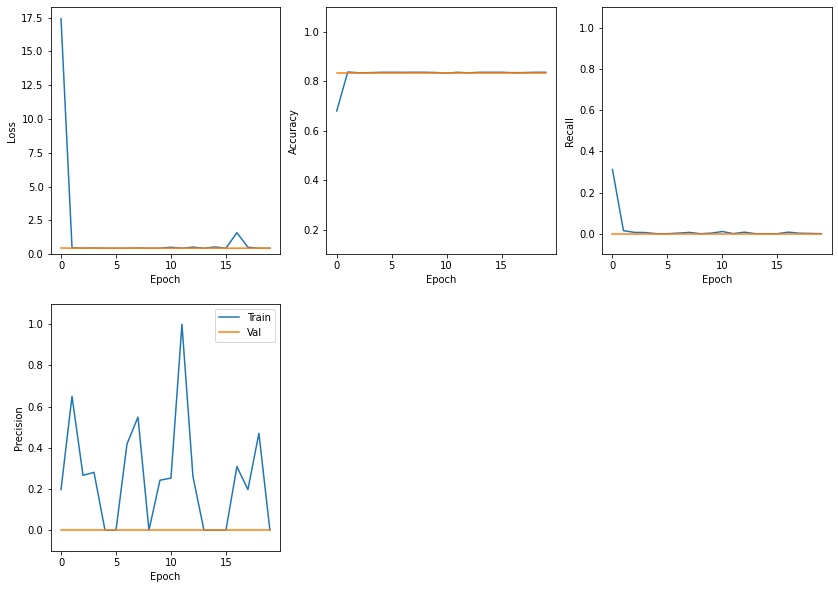

In [136]:
plot_metrics(history_2)

### ANN

float

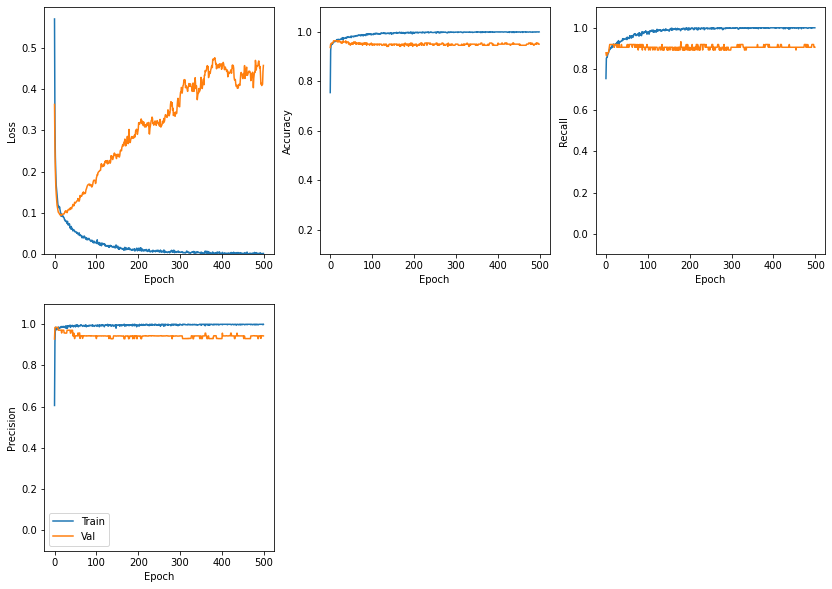

In [137]:
plot_metrics(history_A)

metrics = ['loss', 'accuracy','recall','precision']
type(float(pd.DataFrame(history_A.history['recall']).max()[0]))

### DNN

float

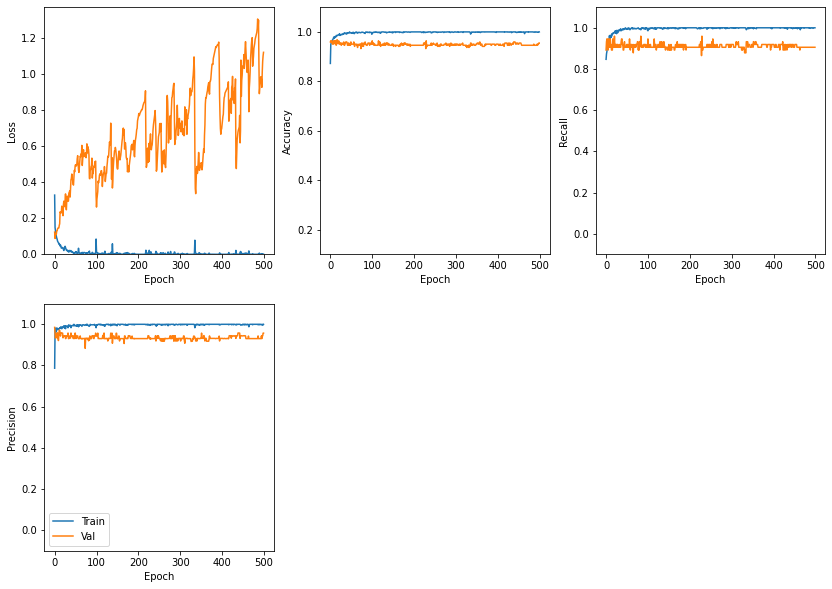

In [138]:
plot_metrics(history_D)

metrics = ['loss', 'accuracy','recall','precision']
type(float(pd.DataFrame(history_D.history['recall']).max()[0]))